In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install numpy
!pip install scikit-learn

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# データの読み込み
df = pd.read_csv('./data/LengthOfStay.csv')

In [4]:
# データの最初の5行を表示
print(df.head())

   eid       vdate rcount gender  dialysisrenalendstage  asthma  irondef  \
0    1   8/29/2012      0      F                      0       0        0   
1    2   5/26/2012     5+      F                      0       0        0   
2    3   9/22/2012      1      F                      0       0        0   
3    4    8/9/2012      0      F                      0       0        0   
4    5  12/20/2012      0      F                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  ...     glucose  \
0      0                    0                           0  ...  192.476918   
1      0                    0                           0  ...   94.078507   
2      0                    0                           0  ...  130.530524   
3      0                    0                           0  ...  163.377028   
4      1                    0                           1  ...   94.886654   

   bloodureanitro  creatinine        bmi  pulse  respiration  \
0         

In [5]:
# データの統計情報を確認
df.describe()

,eid,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,...,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,28867.657797,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,...,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,25000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,50000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,75000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


In [6]:
# データの情報を確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [7]:
# 症状の列を抜き出す
symptoms = ['dialysisrenalendstage', 'asthma', 'irondef', 
           'pneum', 'substancedependence', 'psychologicaldisordermajor', 
           'depress', 'psychother', 'fibrosisandother',  'malnutrition',
           'hemo', 'secondarydiagnosisnonicd9']

# 症状の項目をint型からbool型に変換
df[symptoms] = df[symptoms].astype(bool)

In [8]:
# 'eid', 'vdate', 'discharged'を除外する
df_filtered = df.drop(columns=['eid', 'vdate', 'discharged'])
print(df_filtered.columns)

Index(['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef',
       'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'facid',
       'lengthofstay'],
      dtype='object')


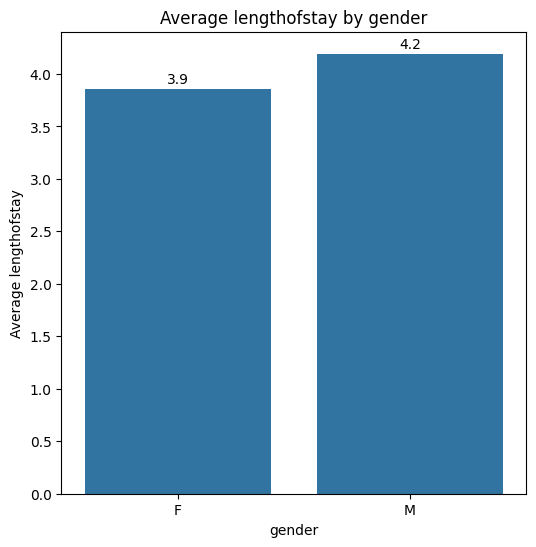

In [9]:
# gender ごとの lengthofstay の平均を計算
gender_distinction = df_filtered.groupby('gender')['lengthofstay'].mean().reset_index()

# グラフの描画
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x='gender', y='lengthofstay', data=gender_distinction, ax=ax)
ax.set_title('Average lengthofstay by gender')
ax.set_xlabel('gender')
ax.set_ylabel('Average lengthofstay')

# 各バーの上に数値ラベルを追加
for index, row in gender_distinction.iterrows():
    ax.text(index, row['lengthofstay'] + 0.05, round(row['lengthofstay'], 1), ha="center")

# グラフを表示
plt.show()

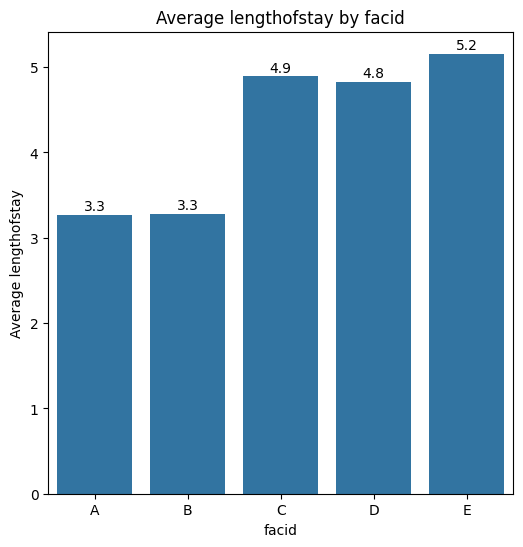

In [10]:
# facid ごとの lengthofstay の平均を計算
facid_distinction = df_filtered.groupby('facid')['lengthofstay'].mean().reset_index()

# グラフの描画
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x='facid', y='lengthofstay', data=facid_distinction, ax=ax)
ax.set_title('Average lengthofstay by facid')
ax.set_xlabel('facid')
ax.set_ylabel('Average lengthofstay')

# 各バーの上に数値ラベルを追加
for index, row in facid_distinction.iterrows():
    ax.text(index, row['lengthofstay'] + 0.05, round(row['lengthofstay'], 1), ha="center")

# グラフを表示
plt.show()

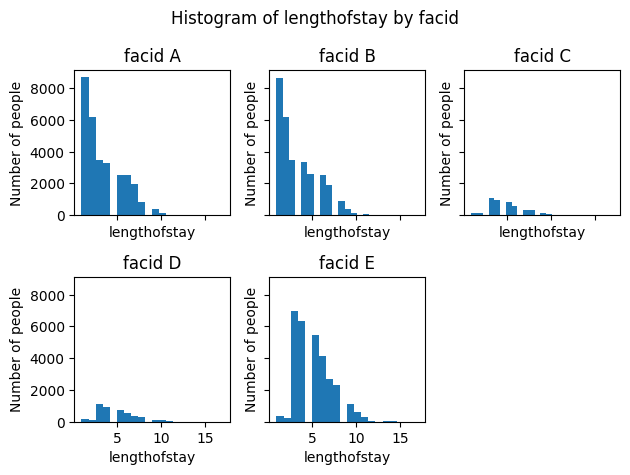

In [11]:
# 2行3列のプロット領域を作成
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
# タイトルを設定
fig.suptitle('Histogram of lengthofstay by facid')
# facidごとのヒストグラムを作成
facilities = ['A', 'B', 'C', 'D', 'E']
for i, facid in enumerate(facilities):
    row, col = divmod(i, 3)  # facidごとにサブプロットの位置を決定
    axs[row, col].hist(df_filtered[df_filtered['facid'] == facid]['lengthofstay'], bins=20) # lengthofstayの最大値17を参考
    axs[row, col].set_title(f'facid {facid}')
    axs[row, col].set_xlabel('lengthofstay')
    axs[row, col].set_ylabel('Number of people')

# 不要なプロットを削除する
fig.delaxes(axs[1, 2])

# レイアウト調整して表示
plt.tight_layout()
plt.show()

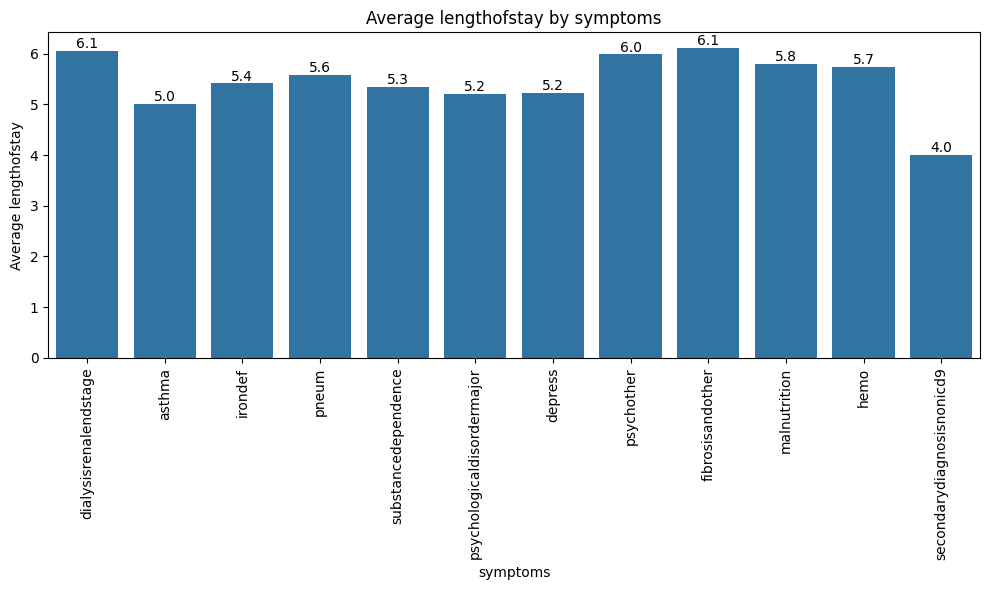

In [12]:
# 各症状を持つ患者の平均入院日数を計算
symptom_distinction = []

for symptom in symptoms:
    avg_lengthofstay = df_filtered.loc[df_filtered[symptom] == 1, 'lengthofstay'].mean()
    symptom_distinction.append((symptom, avg_lengthofstay))

# データフレームに変換
symptom_distinction = pd.DataFrame(symptom_distinction, columns=['symptom', 'average_lengthofstay'])

# グラフの描画
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='symptom', y='average_lengthofstay', data=symptom_distinction)
plt.title('Average lengthofstay by symptoms')
plt.xlabel('symptoms')
plt.ylabel('Average lengthofstay')
plt.xticks(rotation=90)

# 各バーの上に数値ラベルを追加
for index, row in symptom_distinction.iterrows():  
    ax.text(index, row['average_lengthofstay'] + 0.05, round(row['average_lengthofstay'], 1), ha="center")

# レイアウト調整して表示
plt.tight_layout()
plt.show()

In [13]:
# 'rcount' 列で '5+' を 5 に変換
df_filtered['rcount'] = df_filtered['rcount'].replace('5+', 5)

# 結果を確認
print(df_filtered['rcount'].unique())

['0' 5 '1' '3' '4' '2']


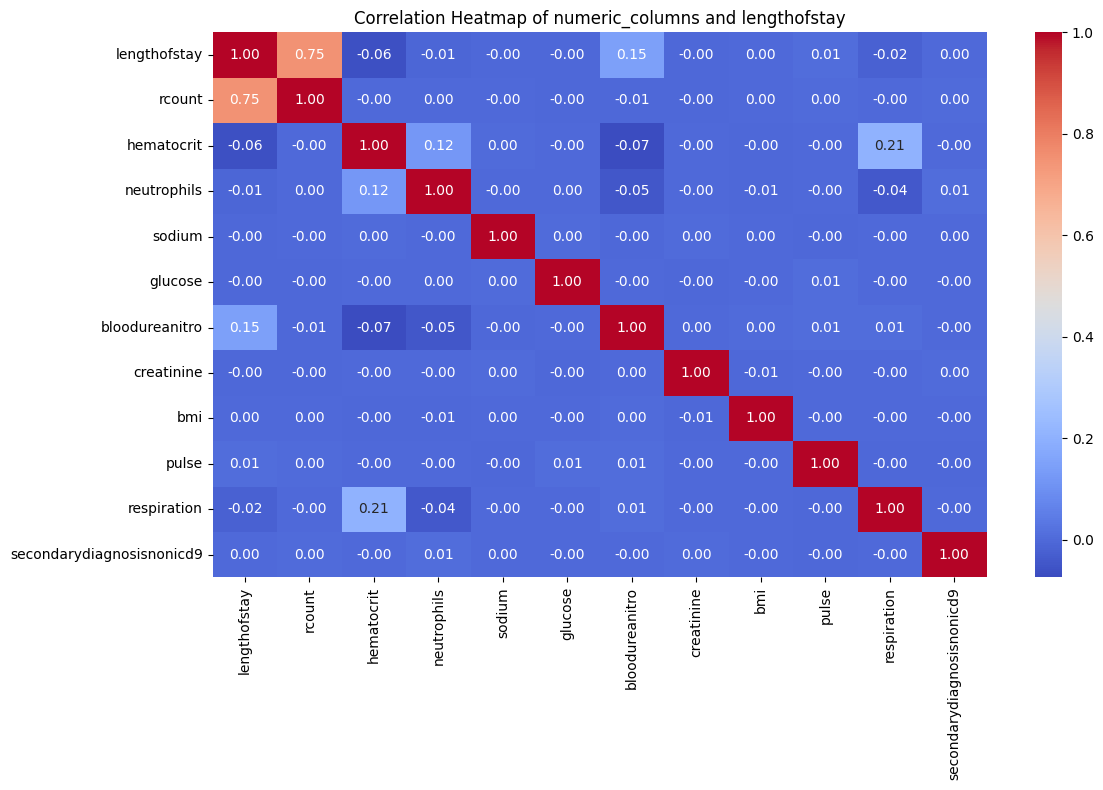

In [14]:
# 数字列を抜き出す
numeric_columns = df_filtered[['lengthofstay', 'rcount', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9']]

# 相関行列を作成
corr_matrix = numeric_columns.corr()

# ヒートマップ作成
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of numeric_columns and lengthofstay')

# レイアウト調整して表示
plt.tight_layout()
plt.show()

In [15]:
# genderに対してOne-Hotエンコーディングを実装
encoded = pd.get_dummies(df_filtered['gender'], prefix='gender')

# 元のデータフレームに結合
df_concat = pd.concat([df_filtered, encoded], axis=1)

# 'gender' 列を削除
df_concat.drop('gender', axis=1, inplace=True)

# 結果を確認
df_concat.head()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid,lengthofstay,gender_F,gender_M
0,0,False,False,False,False,False,False,False,False,False,...,12.0,1.390722,30.432418,96,6.5,True,B,3,True,False
1,5,False,False,False,False,False,False,False,False,False,...,8.0,0.943164,28.460516,61,6.5,True,A,7,True,False
2,1,False,False,False,False,False,False,False,False,False,...,12.0,1.065750,28.843812,64,6.5,True,B,3,True,False
3,0,False,False,False,False,False,False,False,False,False,...,12.0,0.906862,27.959007,76,6.5,True,A,1,True,False
4,0,False,False,False,True,False,True,False,False,False,...,11.5,1.242854,30.258927,67,5.6,True,E,4,True,False


In [16]:
# facidに対してOne-Hotエンコーディングを実装
encoded = pd.get_dummies(df_concat['facid'], prefix='facid')

# 元のデータフレームに結合
df_concat = pd.concat([df_concat, encoded], axis=1)

# 'facid' 列を削除
df_concat.drop('facid', axis=1, inplace=True)

# 結果を確認
df_concat.head()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,respiration,secondarydiagnosisnonicd9,lengthofstay,gender_F,gender_M,facid_A,facid_B,facid_C,facid_D,facid_E
0,0,False,False,False,False,False,False,False,False,False,...,6.5,True,3,True,False,False,True,False,False,False
1,5,False,False,False,False,False,False,False,False,False,...,6.5,True,7,True,False,True,False,False,False,False
2,1,False,False,False,False,False,False,False,False,False,...,6.5,True,3,True,False,False,True,False,False,False
3,0,False,False,False,False,False,False,False,False,False,...,6.5,True,1,True,False,True,False,False,False,False
4,0,False,False,False,True,False,True,False,False,False,...,5.6,True,4,True,False,False,False,False,False,True


In [17]:
# train_test_split関数をインポート
from sklearn.model_selection import train_test_split

In [18]:
# 学習データとテストデータに分割
X = df_concat.drop(columns=['lengthofstay']).to_numpy()
y = df_concat['lengthofstay'].to_numpy()

In [19]:
# 比率7:3で学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70000, 29) (30000, 29) (70000,) (30000,)


In [20]:
# StandardScalerクラスのインポート
from sklearn.preprocessing import StandardScaler

In [21]:
#　インデックスを確認
print(X_train.shape)
print(df_concat.drop(columns=['lengthofstay']).columns)

(70000, 29)
Index(['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum',
       'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F',
       'gender_M', 'facid_A', 'facid_B', 'facid_C', 'facid_D', 'facid_E'],
      dtype='object')


In [24]:
# 標準化したい説明変数を指定
columns_to_scale = [0,12,13,14,15,16,17,18,19,20,21]

In [31]:
# X_trainとX_testから、指定した説明変数を抽出
X_train_selected = X_train[:, columns_to_scale]
X_test_selected = X_test[:, columns_to_scale]

# StandardScalerを使って標準化
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train_selected)
X_test_scaler = scaler.transform(X_test_selected)

# 元のデータをコピーし、標準化した部分だけを代入
X_train_scaled = np.copy(X_train)
X_train_scaled[:, columns_to_scale] = X_train_scaler
X_test_scaled = np.copy(X_test)
X_test_scaled[:, columns_to_scale] = X_test_scaler

# 結果をDataFrameに変換
column_names = [
    'rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 
    'substancedependence', 'psychologicaldisordermajor', 'depress', 
    'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 
    'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 
    'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F', 
    'gender_M', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'
]
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=column_names)
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=column_names)

# データフレームの先頭を表示
df_X_train_scaled.head()
df_X_test_scaled.head()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,pulse,respiration,secondarydiagnosisnonicd9,gender_F,gender_M,facidA,facidB,facidC,facidD,facidE
0,-0.722221,False,False,False,False,False,False,False,False,False,...,-0.552734,-1.925736,0.335577,True,False,True,False,False,False,False
1,-0.074032,False,False,False,False,False,True,False,False,False,...,0.818343,0.01174,0.335577,True,False,False,False,False,False,True
2,-0.722221,False,False,False,False,False,False,False,False,False,...,0.218497,0.01174,0.335577,False,True,True,False,False,False,False
3,-0.722221,False,False,False,False,False,False,False,False,False,...,-0.552734,0.01174,0.335577,False,True,False,True,False,False,False
4,1.222344,False,False,False,False,False,False,False,False,False,...,-1.923811,0.01174,0.335577,True,False,False,True,False,False,False


In [32]:
# 重回帰で分析
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [33]:
# 予測モデルの学習
model.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
# 学習データを用いて決定係数を算出
model.score(X_train_scaled, y_train)

0.7614131673883013

In [35]:
# テストデータを用いて決定係数を算出
model.score(X_test_scaled, y_test)

0.7635262421591311

In [37]:
# テストデータに対する予測
y_pred = model.predict(X_test_scaled)

In [38]:
# 二乗平均平方根誤差（RMSE）の値を算出
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

1.148133546314911

In [39]:
# 平均絶対誤差(MAPE) の値を算出
np.mean(np.abs((y_test - y_pred) / y_test)) * 100

32.36675539112779

In [40]:
# 計算式の確認
print("係数:", model.coef_)
print("切片:", model.intercept_)

係数: [ 1.77396207e+00  7.33129886e-01  3.33089312e-01  3.26258360e-01
  4.40210931e-01  5.73697051e-01  7.68902065e-01  3.61249233e-01
  6.16533999e-01  7.64567272e-01  3.11995678e-01  1.23672985e+00
  2.00199706e-02  1.18842693e-01  2.44022954e-04  3.46209293e-03
  9.72944378e-02 -2.80728663e-03 -1.42629426e-03  3.15118816e-04
 -2.21648867e-02 -7.96574333e-03 -3.55431203e+10 -3.55431203e+10
  1.83726001e+11  1.83726001e+11  1.83726001e+11  1.83726001e+11
  1.83726001e+11]
切片: -148182881003.84454


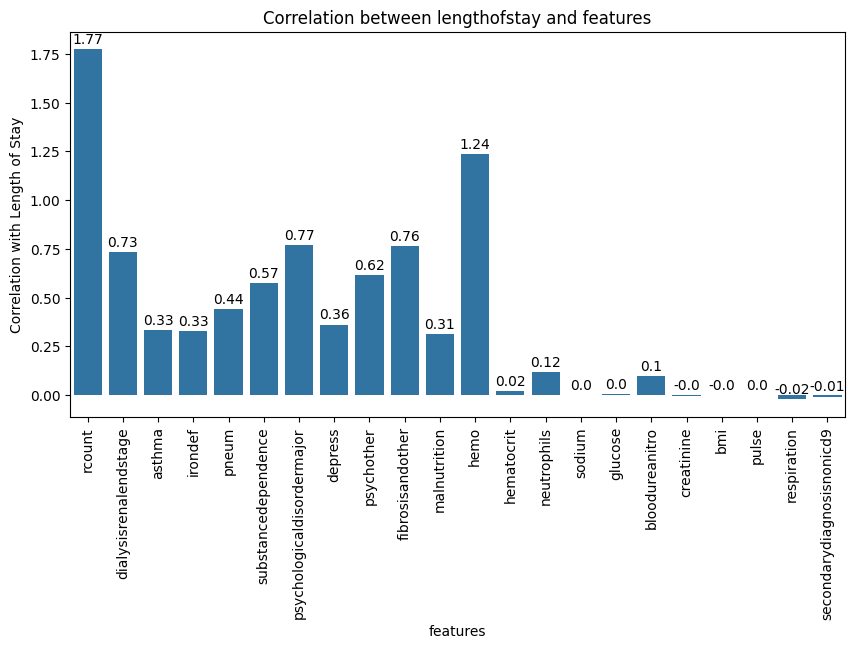

In [41]:
# One-hotエンコーディングした項目以外のものを抽出
features = ['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9']
coefficients = model.coef_[:22]

# 棒グラフのプロット
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=features, y=coefficients)

# グラフの設定
plt.title('Correlation between lengthofstay and features')
plt.xlabel('features')
plt.ylabel('Correlation with Length of Stay')
plt.xticks(rotation=90)

# 各バーの上に数値ラベルを追加して表示
for index, value in enumerate(coefficients):
    ax.text(index, value + 0.03, round(value, 2), ha="center")
plt.show()

In [42]:
# DataFrame に変換
df = pd.DataFrame({
    'Actual': y_test,     # 実際の値
    'Predicted': y_pred   # 予測された値
})

# DataFrame を表示
df

,Actual,Predicted
0,1,1.666504
1,5,4.556976
2,2,2.325867
3,2,1.886414
4,5,5.237915
...,...,...
29995,10,6.791321
29996,3,3.212952
29997,7,6.437622
29998,1,1.775299
